In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [4]:
df = pd.read_csv("usa_rain_prediction_dataset_2024_2025.csv")

In [46]:
df

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0
...,...,...,...,...,...,...,...,...,...
73095,2025-12-27,Washington D.C.,40.614393,65.099438,28.778327,0.000000,54.168514,977.083747,0
73096,2025-12-28,Washington D.C.,52.641643,30.610525,12.282890,0.871000,22.068055,980.591675,0
73097,2025-12-29,Washington D.C.,56.492591,96.740232,2.894762,1.191956,52.336048,1016.469174,1
73098,2025-12-30,Washington D.C.,65.748956,63.900004,24.632400,0.483421,76.785280,1032.396146,1


In [5]:
display(df.head())
df.info()

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           73100 non-null  object 
 1   Location       73100 non-null  object 
 2   Temperature    73100 non-null  float64
 3   Humidity       73100 non-null  float64
 4   Wind Speed     73100 non-null  float64
 5   Precipitation  73100 non-null  float64
 6   Cloud Cover    73100 non-null  float64
 7   Pressure       73100 non-null  float64
 8   Rain Tomorrow  73100 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 5.0+ MB


In [6]:
print("Missing values per column:")
print(df.isnull().sum())



Missing values per column:
Date             0
Location         0
Temperature      0
Humidity         0
Wind Speed       0
Precipitation    0
Cloud Cover      0
Pressure         0
Rain Tomorrow    0
dtype: int64


In [7]:
duplicate_rows_count = df.duplicated().sum()
print(f"Total number of duplicate rows: {duplicate_rows_count}")

Total number of duplicate rows: 0


In [50]:
display(df.describe())

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,65.182270,59.875041,15.017946,0.390635,54.942807,1005.176013,0.220410
std,20.205793,23.066115,8.668729,0.474833,25.982487,20.203889,0.414526
min,30.000766,20.000272,0.000712,0.000000,10.000856,970.000919,0.000000
25%,47.678968,39.800732,7.485182,0.000000,32.318668,987.697646,0.000000
50%,65.294949,59.887840,15.102495,0.196909,55.011121,1005.284188,0.000000
75%,82.636570,79.835990,22.551794,0.673177,77.412469,1022.727410,0.000000
max,99.997393,99.999025,29.999017,3.078090,99.998957,1039.999765,1.000000


In [13]:
# Calculate skewness for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
skewness = df[numerical_cols].skew()

print("Skewness of numerical features:")
print(skewness)

Skewness of numerical features:
Temperature     -0.014391
Humidity         0.003375
Wind Speed      -0.007681
Precipitation    1.241112
Cloud Cover      0.000772
Pressure        -0.010555
Rain Tomorrow    1.348997
dtype: float64


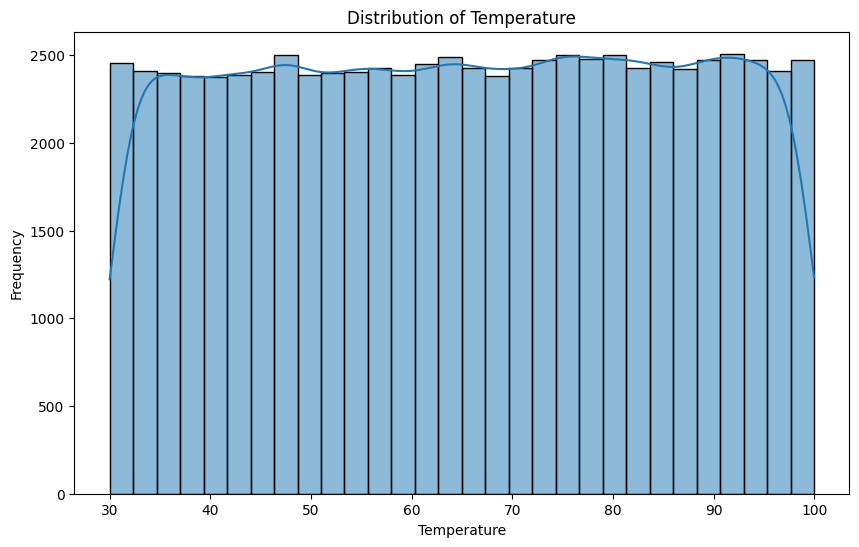

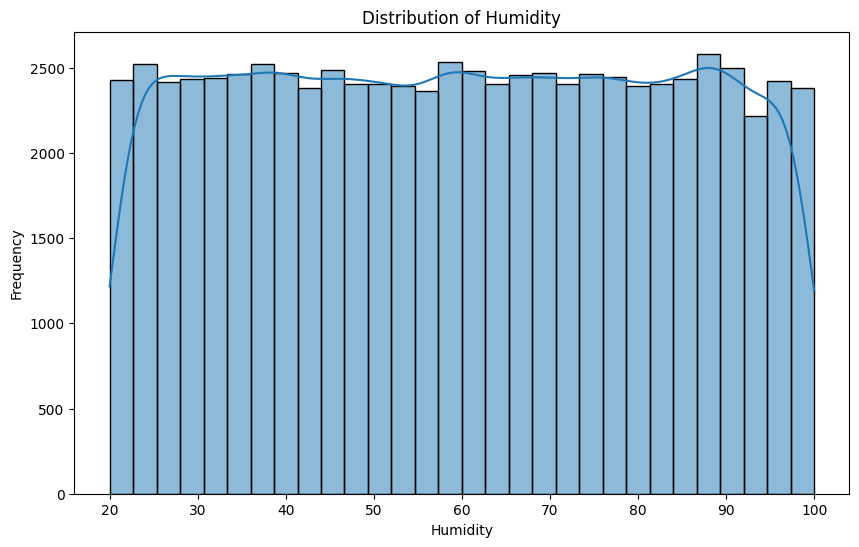

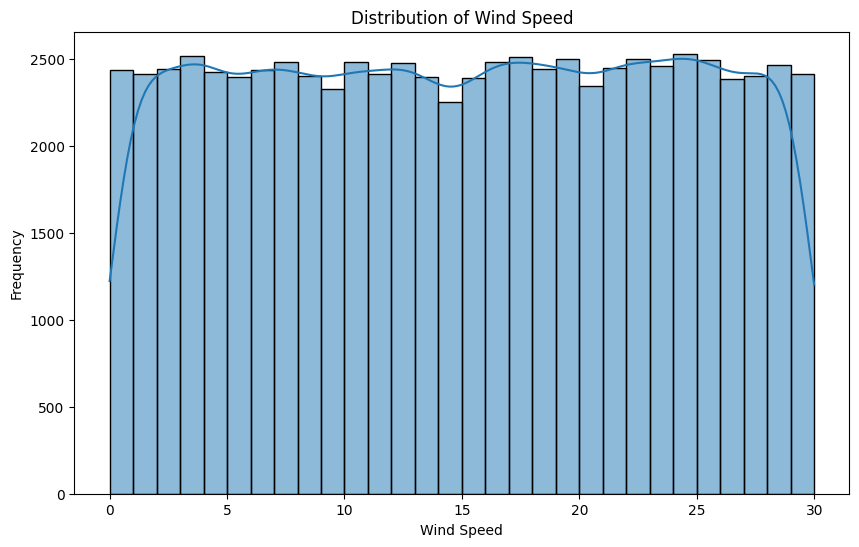

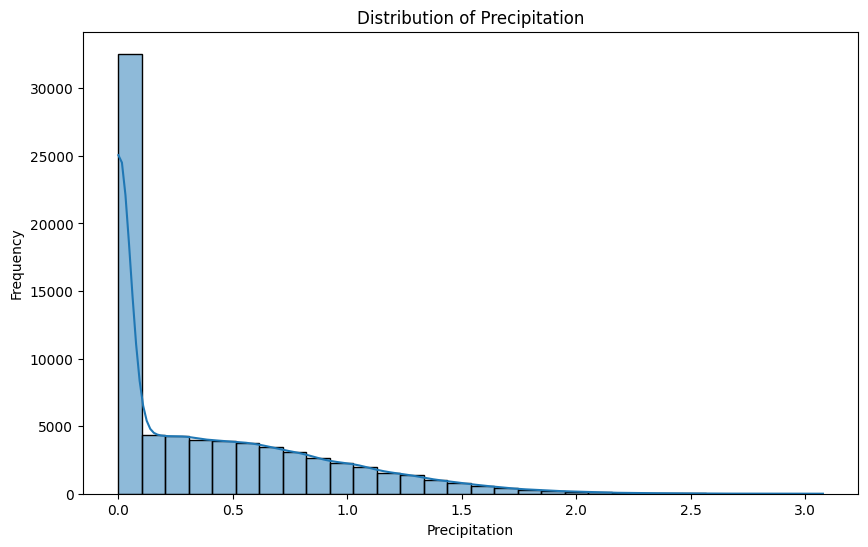

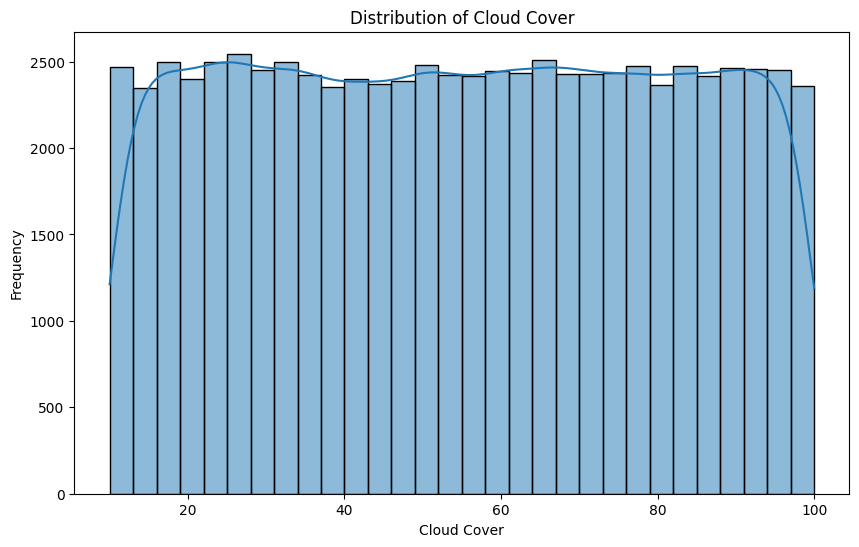

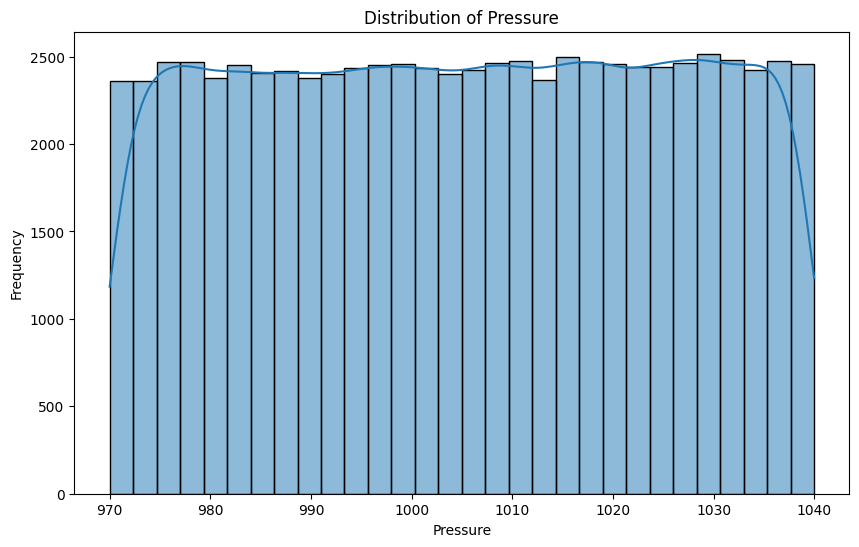

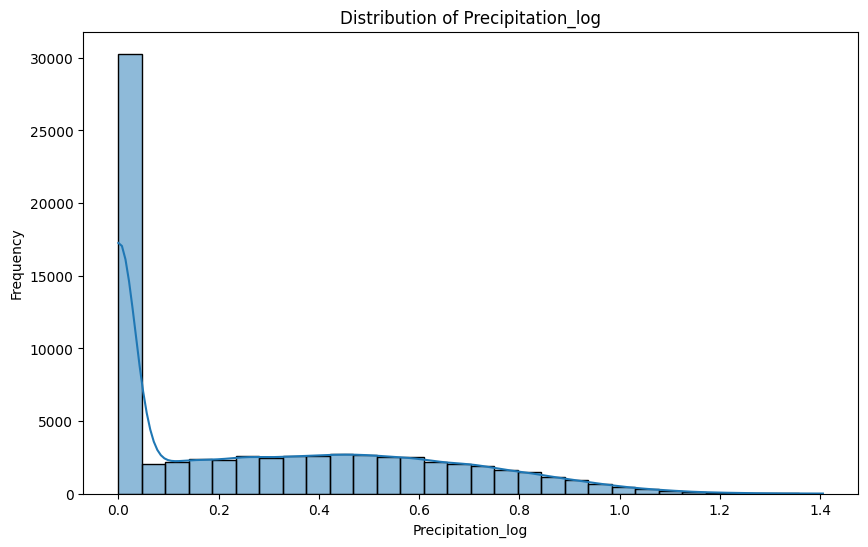

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols.drop('Rain Tomorrow')

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

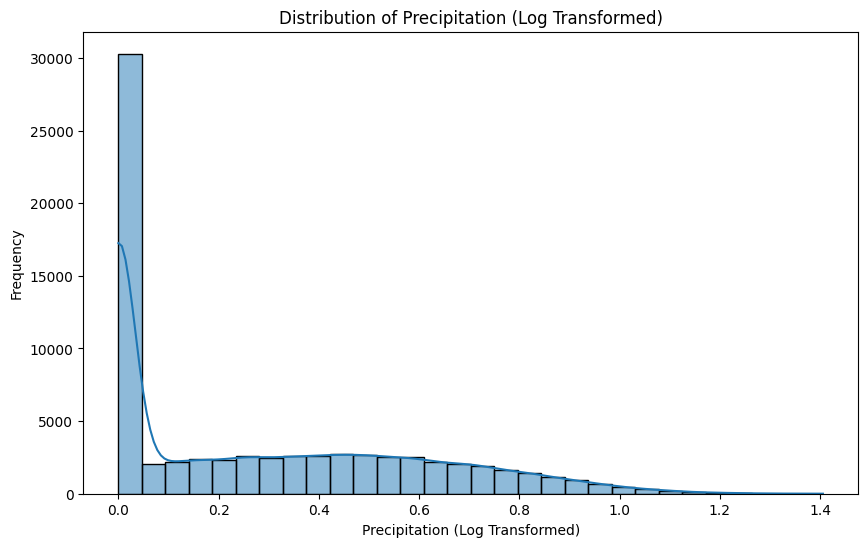

Skewness of Precipitation after log transformation: 0.7629


In [17]:
import numpy as np
df['Precipitation_log'] = np.log1p(df['Precipitation'])


plt.figure(figsize=(10, 6))
sns.histplot(df['Precipitation_log'], bins=30, kde=True)
plt.title('Distribution of Precipitation (Log Transformed)')
plt.xlabel('Precipitation (Log Transformed)')
plt.ylabel('Frequency')
plt.show()


print(f"Skewness of Precipitation after log transformation: {df['Precipitation_log'].skew():.4f}")

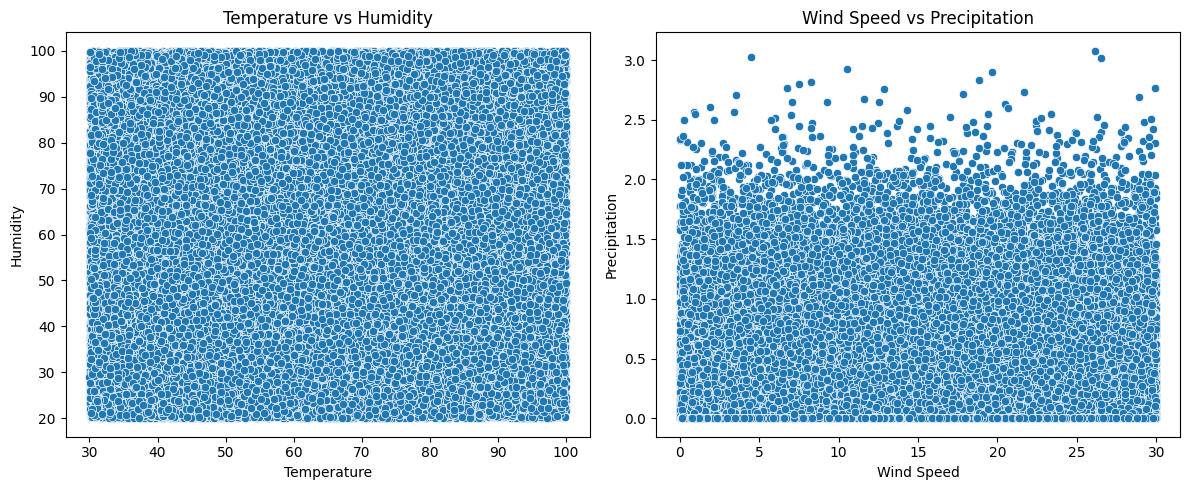

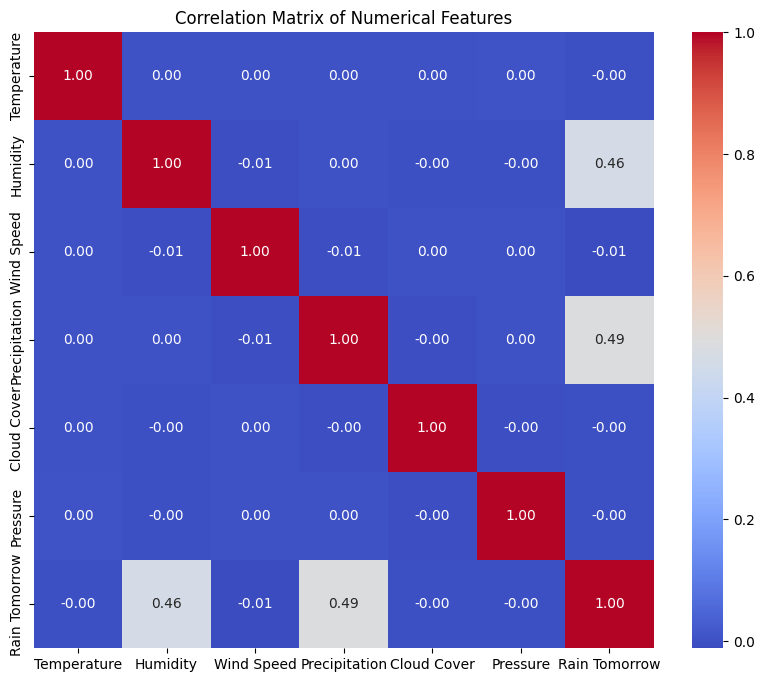

In [11]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create scatter plots for a few relevant pairs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Temperature', y='Humidity')
plt.title('Temperature vs Humidity')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Wind Speed', y='Precipitation')
plt.title('Wind Speed vs Precipitation')
plt.tight_layout()
plt.show()

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

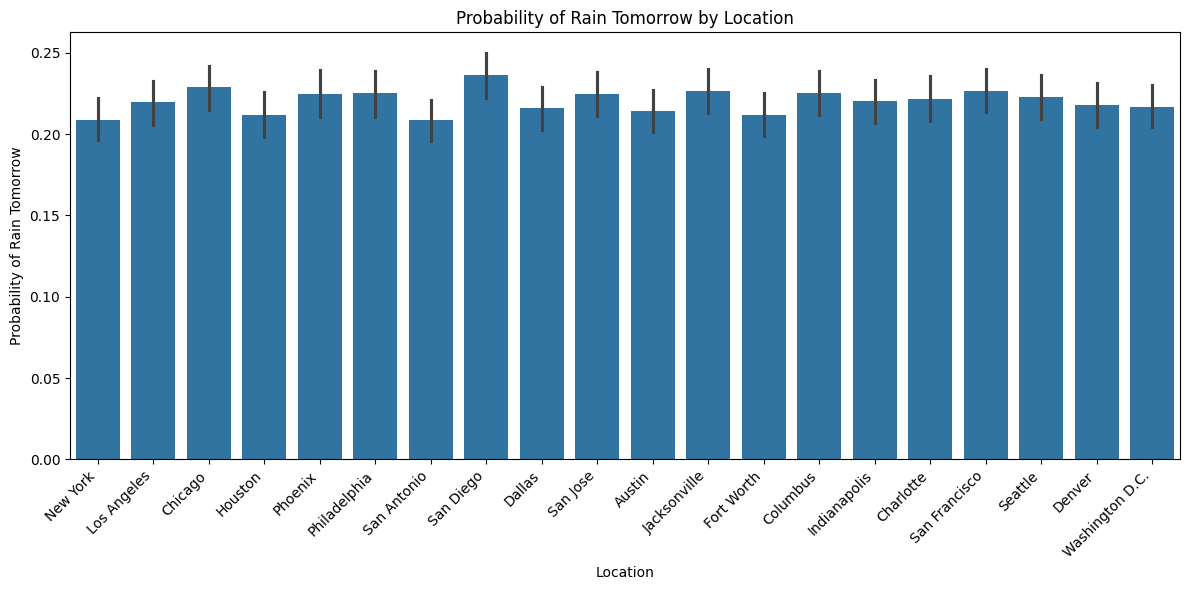

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Location', y='Rain Tomorrow', estimator=lambda x: sum(x)/len(x))
plt.title('Probability of Rain Tomorrow by Location')
plt.xlabel('Location')
plt.ylabel('Probability of Rain Tomorrow')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

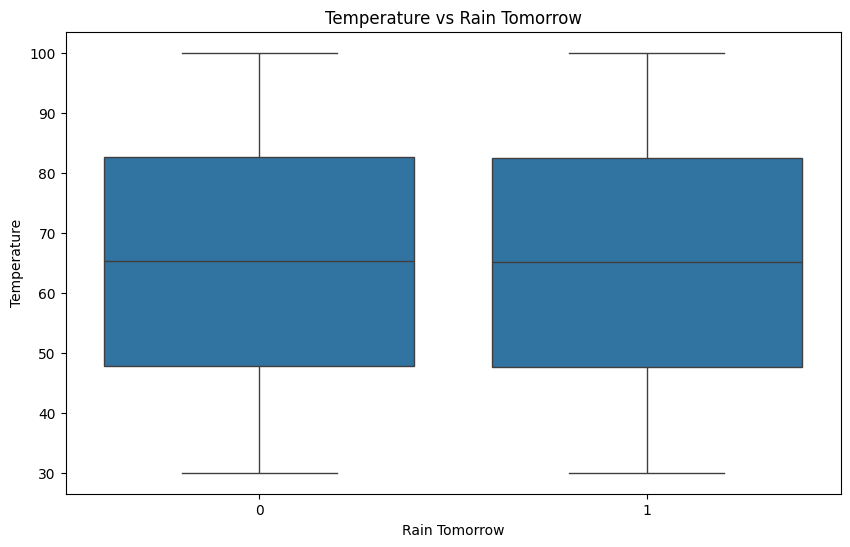

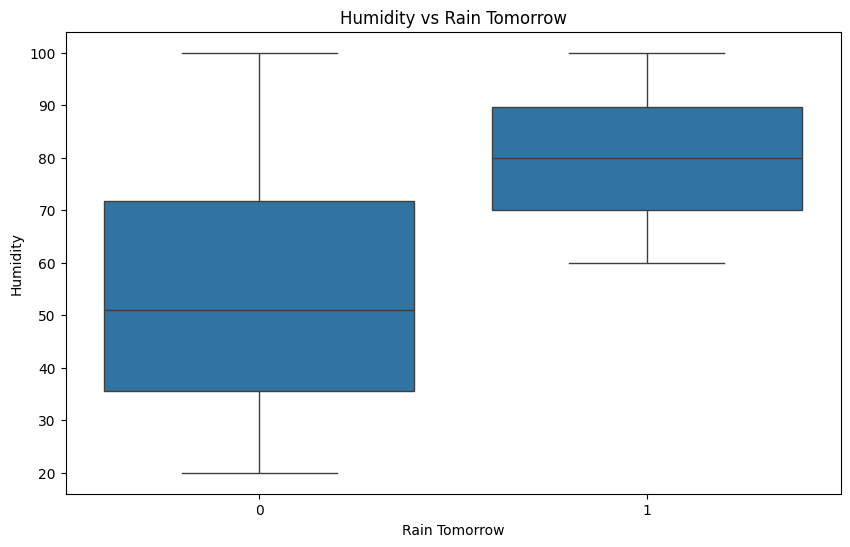

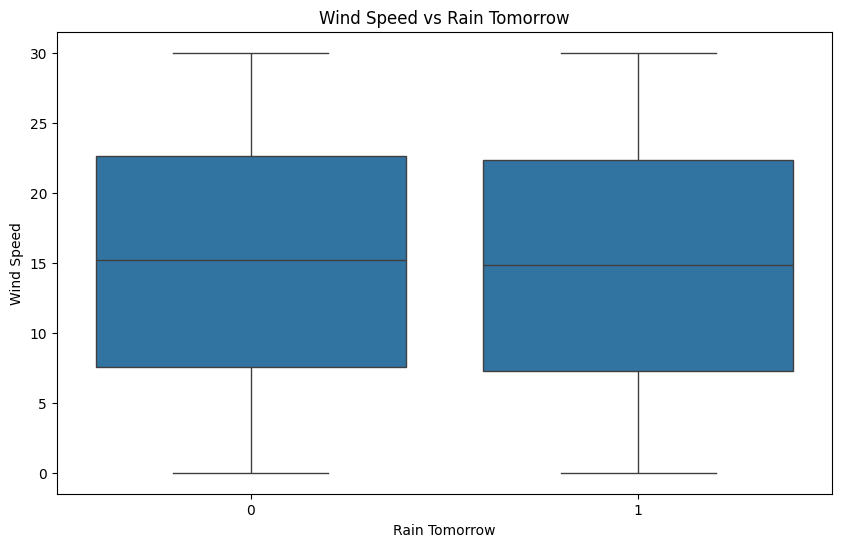

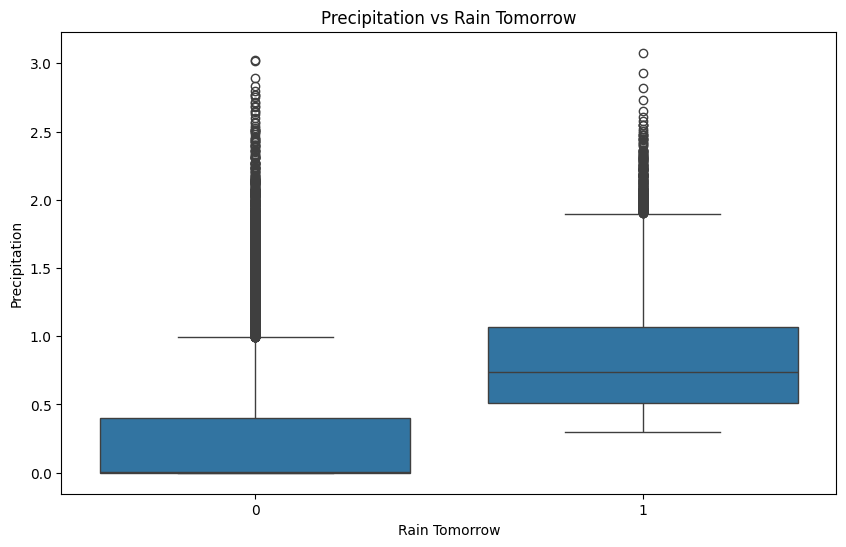

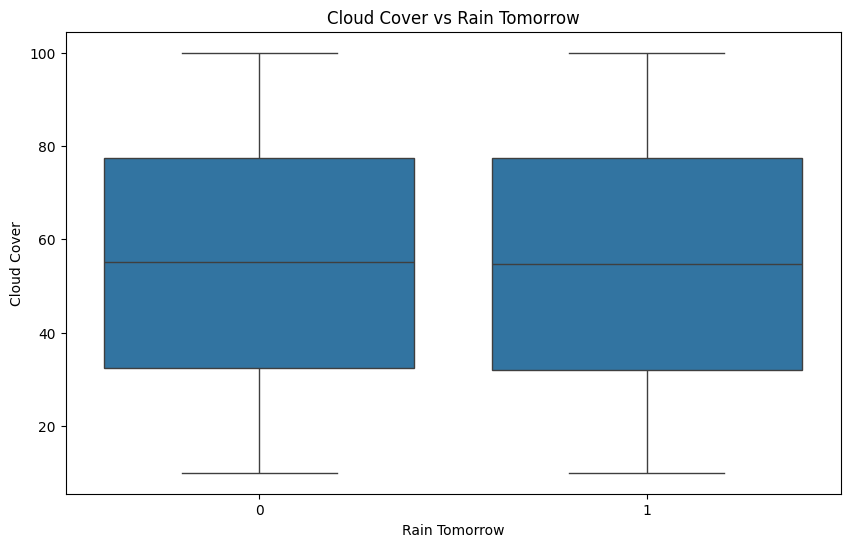

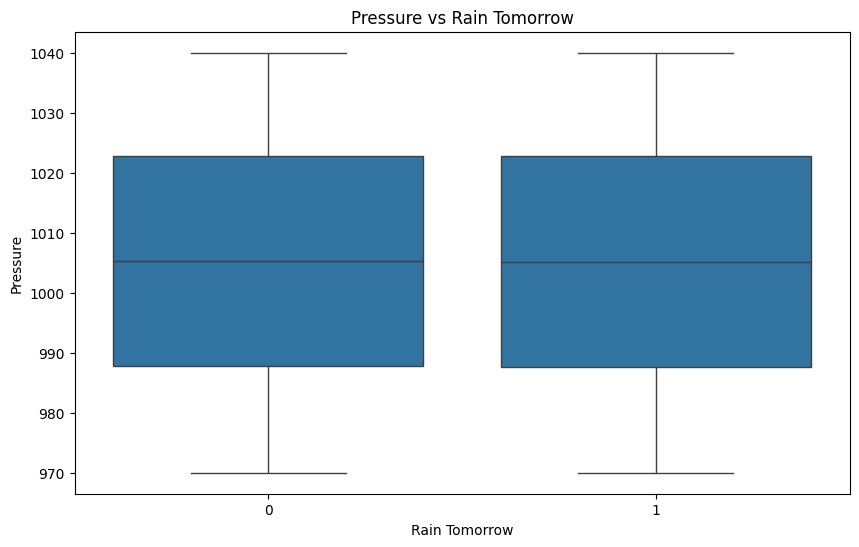

In [55]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols.drop('Rain Tomorrow')

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Rain Tomorrow', y=col)
    plt.title(f'{col} vs Rain Tomorrow')
    plt.xlabel('Rain Tomorrow')
    plt.ylabel(col)
    plt.show()

In [56]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('Rain Tomorrow')
print("Numerical columns for outlier detection:")
print(numerical_cols)

Numerical columns for outlier detection:
['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure']


In [57]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

display(df.head())
print(f"Shape of DataFrame after outlier removal: {df.shape}")

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0


Shape of DataFrame after outlier removal: (71908, 9)


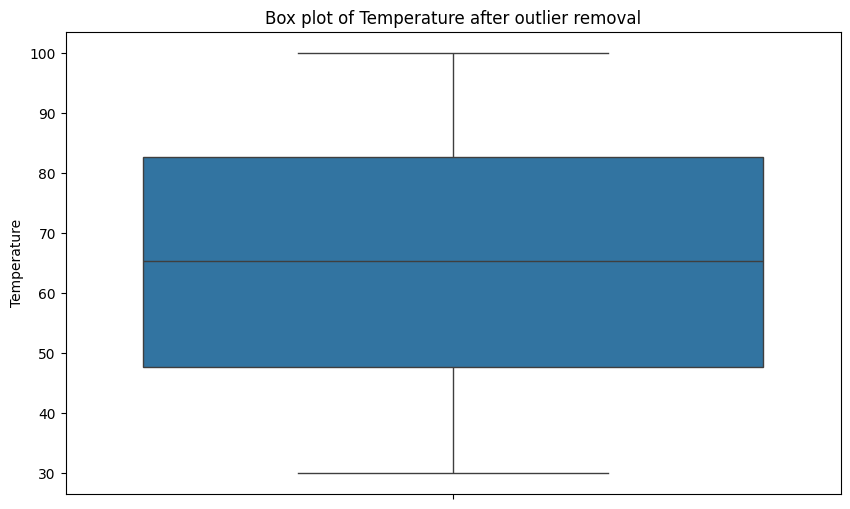

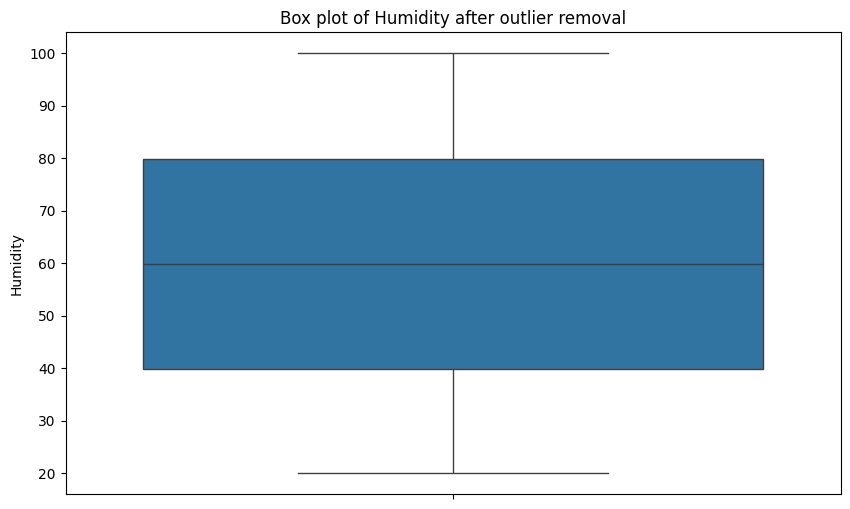

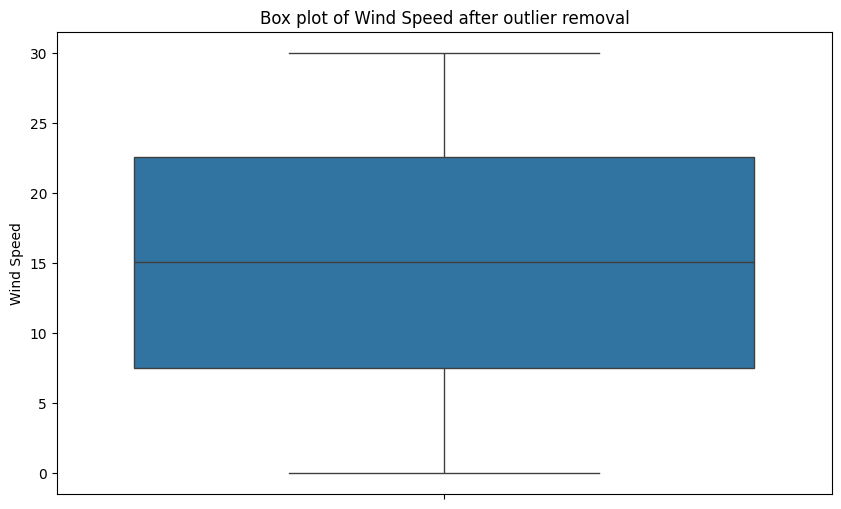

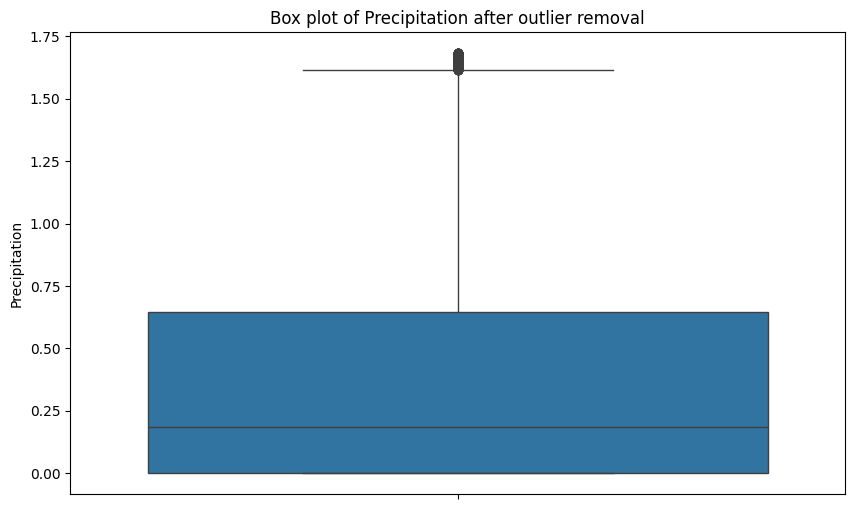

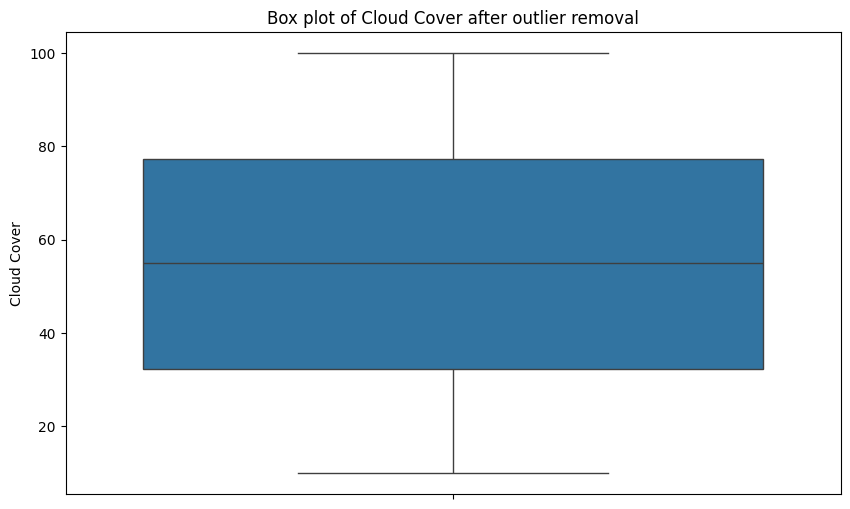

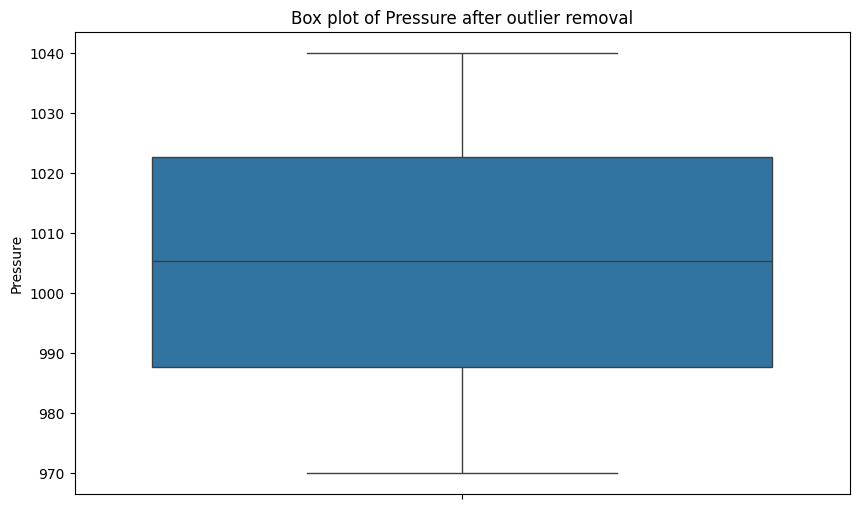

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols.drop('Rain Tomorrow', errors='ignore')

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, y=col)
    plt.title(f'Box plot of {col} after outlier removal')
    plt.ylabel(col)
    plt.show()

In [31]:
X = df.drop(['Date', 'Rain Tomorrow'], axis=1)
y = df['Rain Tomorrow']

In [32]:
X = pd.get_dummies(X, columns=['Location'], drop_first=True)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = GaussianNB()
model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [38]:
y_pred = model.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.9189
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11369
           1       0.88      0.73      0.80      3251

    accuracy                           0.92     14620
   macro avg       0.91      0.85      0.87     14620
weighted avg       0.92      0.92      0.92     14620



In [40]:
import pickle

filename = "naive_bayes_weather_model.pkl"

# Save the model
with open(filename, 'wb') as file:
    pickle.dump(model, file)
